In [1]:
import pandas as pd
import os as os
import csv
import time

In [3]:
df = pd.read_csv("./datasets/italy.csv")

In [4]:
df

,text,disaster,gpe
0,RT DisasterChannL MT emergenzavvf ItalyEarthqu...,"rubble, rescue",NaN
1,BREAKING Italian firefighter chief said a 8 ye...,rubble,NaN
2,GraysonDolan EthanDolan please Italy needs lot...,NaN,Italy
3,RT OfficialMrX Im praying for everyone affecte...,tragedy,NaN
4,Ground Still Shaking as Italy Quake Death Toll...,"Shaking, Ground",Italy
...,...,...,...
147,RT SkyNewsBreak The Queen has made a personal ...,"rescue, search, support",NaN
148,"67, 960 raised of 1, 000, 000 goal after 1 day...","Relief, Earthquake",Italy
149,The Happiness Family continues to pray for tho...,earthquake,"Italy, pray"
150,RT jfkbydbay My prayers to those affected by t...,"earthquake, strong",Italy


In [5]:
import ollama
import re

def remove_before_think(text):
    return re.sub(r'^.*?</think>', '', text)

model = "deepseek-r1:1.5b"

def deepseek_response(prompt):
    response = ollama.chat(model=model, messages=[{"role": "user", "content": prompt}])
    content = response.message.content
    return re.sub(r'^.*?</think>\s*', '', content, flags=re.DOTALL)

In [6]:
df = df.dropna(subset=['gpe'])

In [7]:
df = df[:500]

In [8]:
df.to_csv("./datasets/italy.csv", index=False)

In [9]:
# Assume deepseek_response() is already defined
# def deepseek_response(text):
#     return "Some GPE response"  # Replace with actual LLM function

# CSV file path
csv_file = "./datasets/italy.csv"

# Read the existing CSV file
df = pd.read_csv(csv_file)

# Add new columns if not present
if "detected_gpe" not in df.columns:
    df["detected_gpe"] = ""
if "response_time" not in df.columns:
    df["response_time"] = ""

# Process each row and update detected_gpe and response_time
for index, row in df.iterrows():
    if pd.isna(row["detected_gpe"]) or row["detected_gpe"].strip() == "":
        text = row["text"]
        
        # Add instruction with a newline before the actual text
        prompt = f"Identify locations like country, city, or any local areas in the following sentence and write them in a comma-separated manner (no additional details required):\n\n{text}"
        
        start_time = time.time()  # Start timing
        detected_gpe = deepseek_response(prompt)  # Get LLM response
        end_time = time.time()  # End timing

        # Calculate response time
        response_time = round(end_time - start_time, 4)  # Rounded to 4 decimal places

        # Clean multiline response: strip spaces, join with commas if needed
        detected_gpe = ", ".join(line.strip() for line in detected_gpe.split("\n") if line.strip())

        # Update DataFrame
        df.at[index, "detected_gpe"] = detected_gpe
        df.at[index, "response_time"] = response_time

        # Save the updated row immediately to keep tracking progress
        df.to_csv(csv_file, index=False, quoting=csv.QUOTE_NONNUMERIC)

print("CSV file updated with detected GPE values and response times!")

CSV file updated with detected GPE values and response times!


In [10]:
df = pd.read_csv("./datasets/italy.csv")

In [11]:
df

,text,disaster,gpe,detected_gpe,response_time
0,GraysonDolan EthanDolan please Italy needs lot...,NaN,Italy,"GraysonDolan, EthanDolan, Italy, 45500, PrayFo...",15.9729
1,Ground Still Shaking as Italy Quake Death Toll...,"Shaking, Ground",Italy,"Italy, Earthquake",4.1701
2,RT MikeBossio My heart goes out to those affec...,NaN,"Italy, Italy",Italy,8.0929
3,Thanks a lot from Italy ladygaga. PrayForItaly...,NaN,Italy,"Italy, Terremoto",5.1553
4,3 4 of town of Amatrice destroyed in 6.2 magni...,"felt, Aftershock, magnitude, destroyed","Rome, Amatrice","Amatria, Rome, Italy, Earthquake",10.6876
...,...,...,...,...,...
82,RT JohnCabotRome Whether youre in Rome or abro...,NaN,Rome,"Rome, Italy, Learn More",3.8856
83,"67, 960 raised of 1, 000, 000 goal after 1 day...","Relief, Earthquake",Italy,"Italy, Earthquake Relief Fund, prayforitaly",7.5389
84,The Happiness Family continues to pray for tho...,earthquake,"Italy, pray","Italy, prayforitaly",6.8815
85,RT jfkbydbay My prayers to those affected by t...,"earthquake, strong",Italy,"Italy, jfkbydbay",6.1332


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           87 non-null     object 
 1   disaster       57 non-null     object 
 2   gpe            87 non-null     object 
 3   detected_gpe   87 non-null     object 
 4   response_time  87 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.5+ KB


In [13]:
import tiktoken  # Ensure tiktoken is installed

# Assume deepseek_response() is already defined
# def deepseek_response(text):
#     return "Some GPE response"  # Replace with actual LLM function

# Load tokenizer (using OpenAI's tokenizer as an example)
tokenizer = tiktoken.get_encoding("cl100k_base")  # Update if using another tokenizer


# Add new columns if not present
for col in ["query_tokens", "response_tokens"]:
    if col not in df.columns:
        df[col] = ""

# Process each row and update detected_gpe, response_time, and token counts
for index, row in df.iterrows():
    text = row["text"]
    detected_gpe = row["detected_gpe"]
    prompt = f"Identify locations like country, city, or any local areas in the following sentence and write them in a comma-separated manner (no additional details required):\n\n{text}"
    # Token count using DeepSeek's tokenizer
    query_tokens = len(tokenizer.encode(prompt))
    response_tokens = len(tokenizer.encode(detected_gpe))

    df.at[index, "query_tokens"] = query_tokens
    df.at[index, "response_tokens"] = response_tokens

    # Save the updated row immediately to keep tracking progress
    df.to_csv(csv_file, index=False, quoting=csv.QUOTE_NONNUMERIC)

print("CSV file updated with detected GPE values, response times, and token counts!")


CSV file updated with detected GPE values, response times, and token counts!


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             87 non-null     object 
 1   disaster         57 non-null     object 
 2   gpe              87 non-null     object 
 3   detected_gpe     87 non-null     object 
 4   response_time    87 non-null     float64
 5   query_tokens     87 non-null     object 
 6   response_tokens  87 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.9+ KB


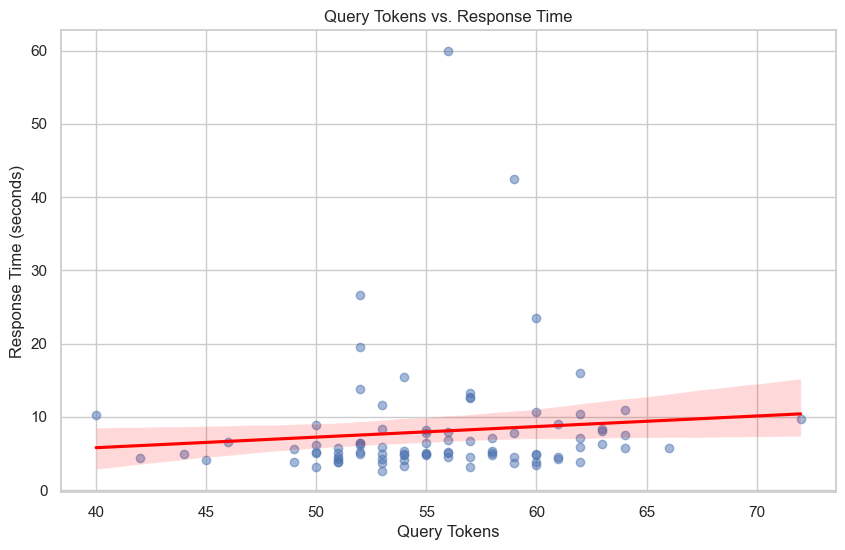

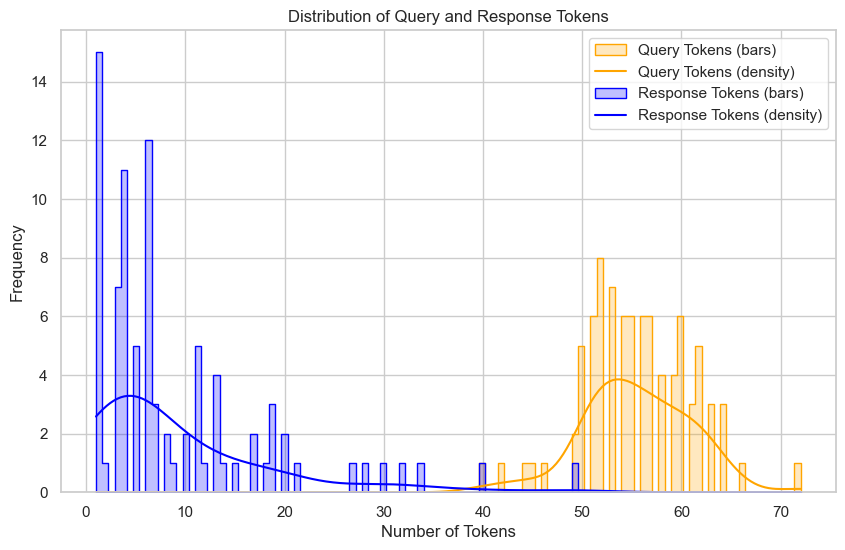

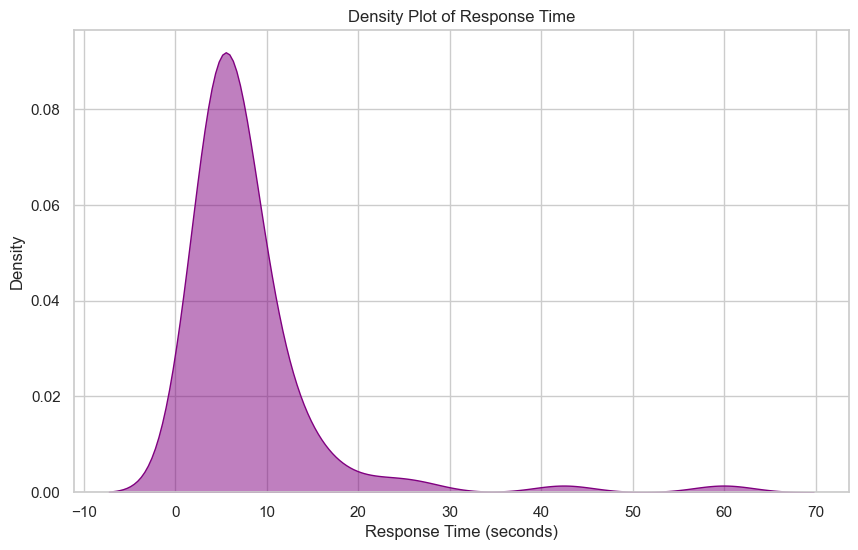

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV file path
csv_file = "./datasets/italy.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Convert columns to numeric (in case they were mistakenly read as object)
df["query_tokens"] = pd.to_numeric(df["query_tokens"], errors="coerce")
df["response_tokens"] = pd.to_numeric(df["response_tokens"], errors="coerce")
df["response_time"] = pd.to_numeric(df["response_time"], errors="coerce")

# Set plot style
sns.set_theme(style="whitegrid")

# Figure 1: Scatter Plot (Query Tokens vs. Response Time)
plt.figure(figsize=(10, 6))
sns.regplot(x=df["query_tokens"], y=df["response_time"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Query Tokens")
plt.ylabel("Response Time (seconds)")
plt.title("Query Tokens vs. Response Time")
plt.show()

# Figure 2: Bar Chart (Query Tokens vs. Response Tokens)
plt.figure(figsize=(10, 6))
sns.histplot(df[["response_tokens", "query_tokens"]], bins=114, kde=True, element="step", palette=["blue", "orange"])
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.title("Distribution of Query and Response Tokens")
plt.legend(["Query Tokens (bars)", "Query Tokens (density)","Response Tokens (bars)", "Response Tokens (density)"])
plt.show()

# Figure 3: Density Plot (Response Time Distribution)
plt.figure(figsize=(10, 6))
sns.kdeplot(df["response_time"], fill=True, color="purple", alpha=0.5)
plt.xlabel("Response Time (seconds)")
plt.ylabel("Density")
plt.title("Density Plot of Response Time")
plt.show()


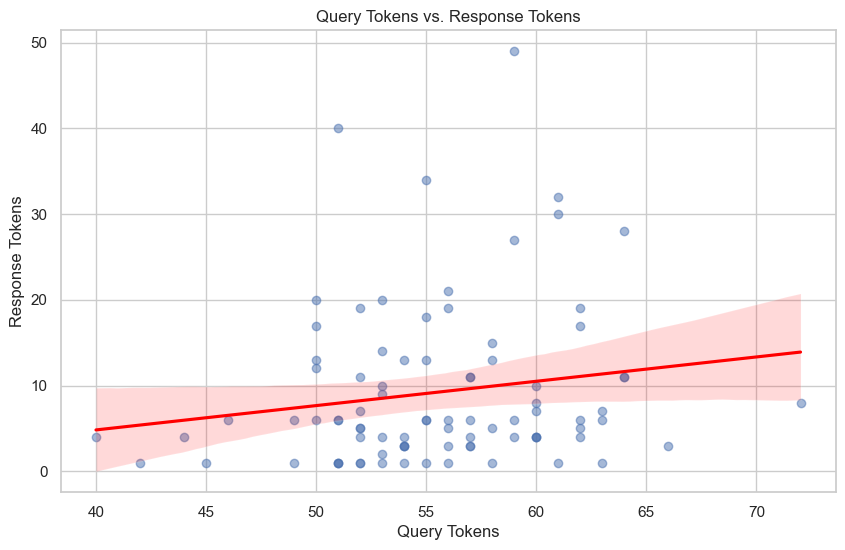

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["query_tokens"], y=df["response_tokens"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Query Tokens")
plt.ylabel("Response Tokens")
plt.title("Query Tokens vs. Response Tokens")
plt.show()

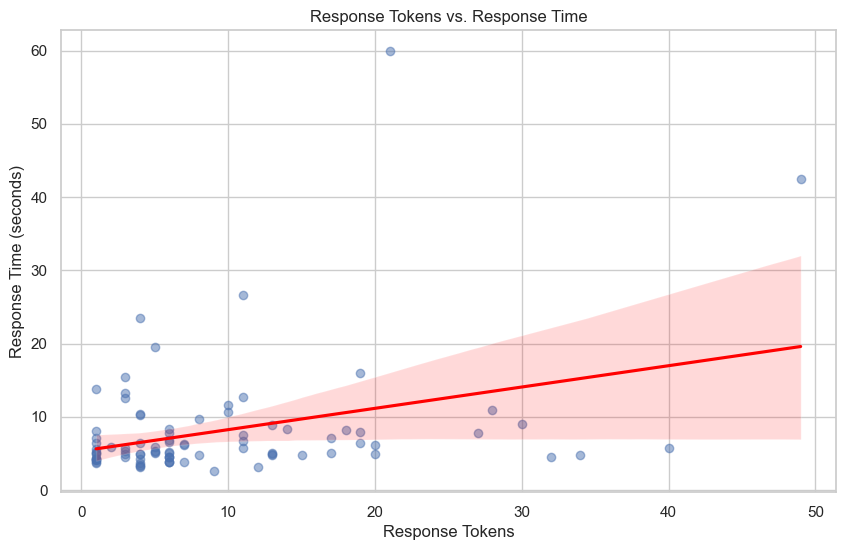

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["response_tokens"], y=df["response_time"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Response Tokens")
plt.ylabel("Response Time (seconds)")
plt.title("Response Tokens vs. Response Time")
plt.show()

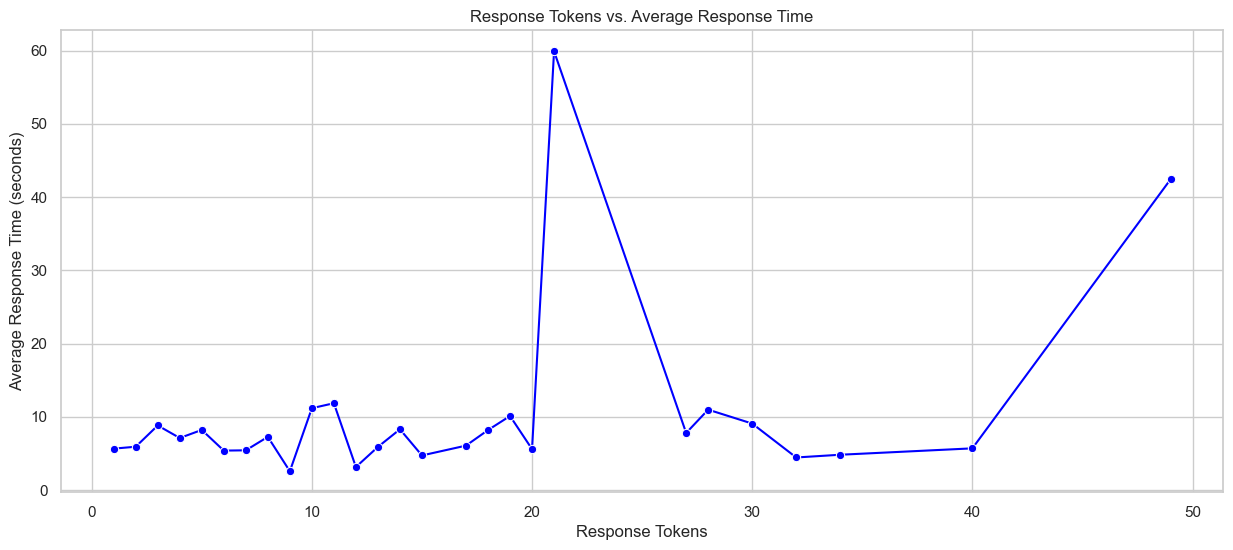

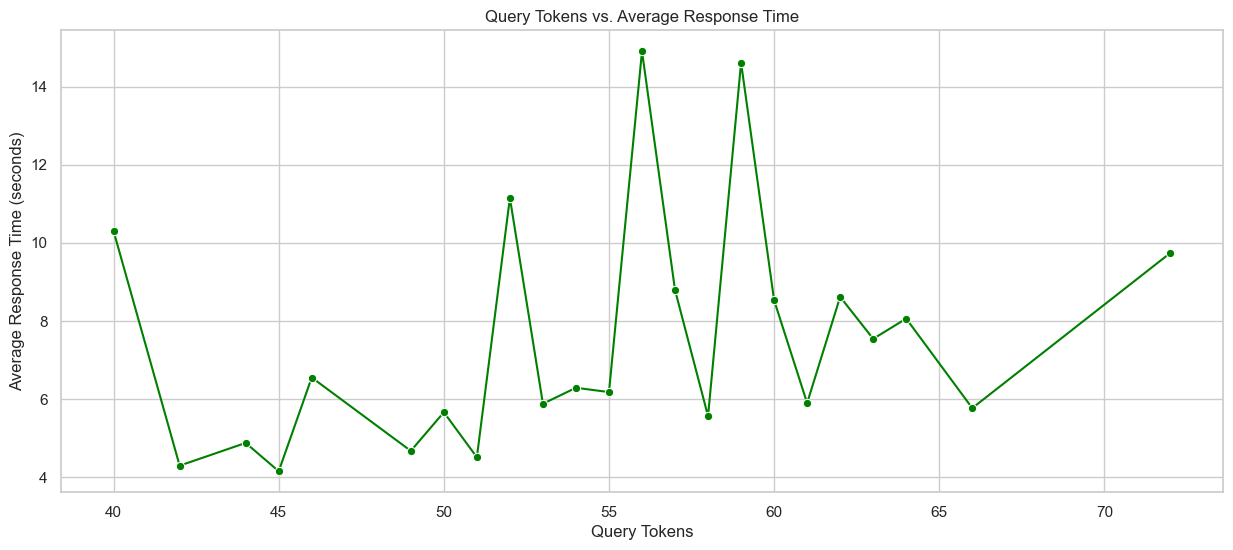

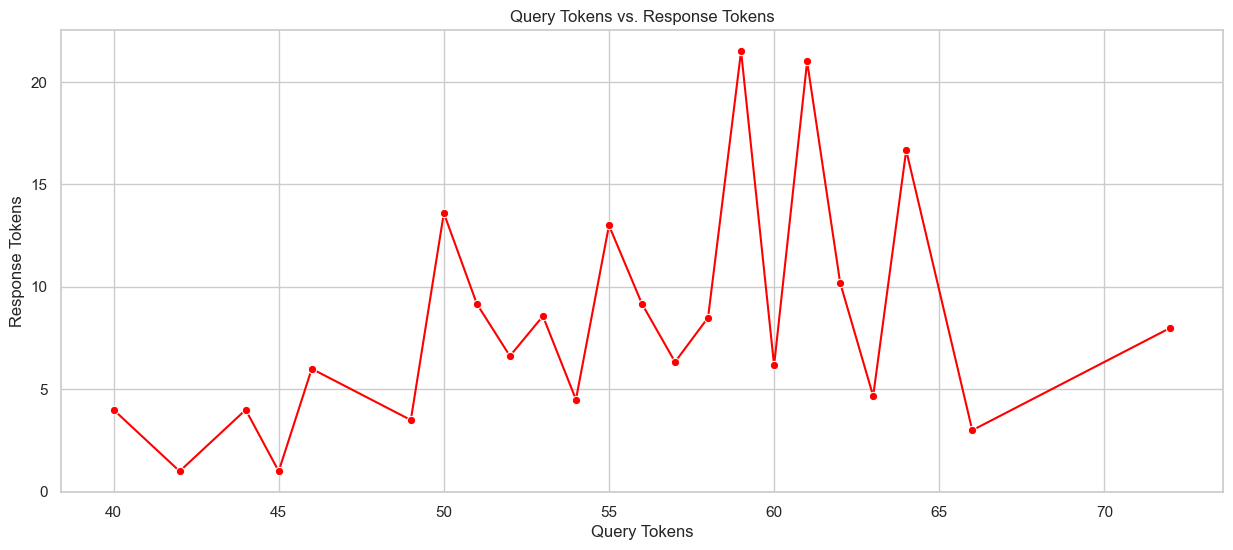

In [18]:
avg_response_time_r = df.groupby("response_tokens")["response_time"].mean().reset_index()
avg_response_time_q = df.groupby("query_tokens")["response_time"].mean().reset_index()
avg_response_tokens = df.groupby("query_tokens")["response_tokens"].mean().reset_index()
# Set plot style
sns.set_theme(style="whitegrid")

# Plot: Response Tokens vs. Average Response Time
plt.figure(figsize=(15, 6))
sns.lineplot(x=avg_response_time_r["response_tokens"], y=avg_response_time_r["response_time"], marker="o", color="blue")
plt.xlabel("Response Tokens")
plt.ylabel("Average Response Time (seconds)")
plt.title("Response Tokens vs. Average Response Time")
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x=avg_response_time_q["query_tokens"], y=avg_response_time_q["response_time"], marker="o", color="green")
plt.xlabel("Query Tokens")
plt.ylabel("Average Response Time (seconds)")
plt.title("Query Tokens vs. Average Response Time")
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x=avg_response_tokens["query_tokens"], y=avg_response_tokens["response_tokens"], marker="o", color="red")
plt.xlabel("Query Tokens")
plt.ylabel("Response Tokens")
plt.title("Query Tokens vs. Response Tokens")
plt.show()

In [27]:
df

,text,disaster,gpe,detected_gpe,response_time,query_tokens,response_tokens
0,China is willing to provide emergency humanita...,NaN,"Syria, syria, China, china, Turkey, turkey, an...","China, Turkey, Syria, Damascus, Istanbul, Ankara",9.4788,54,11
1,"Earthquake kills more than 1, 300 in southern ...",NaN,"Turkey, turkey, ankara","southern turkey, turkish cities",4.5630,53,8
2,THOUSANDS of people in Syria and Turkey are un...,NaN,"Syria, Turkey","Syria, Turkey",7.2047,55,4
3,Heart heavy for Turkey Syria Lebanon and all t...,NaN,"Syria, Turkey, Lebanon","Turkey, Syria, Lebanon, and others affected by...",5.3183,72,14
4,Everyone of these rich kid philanthropist are ...,NaN,Turkey,"Turkey, Earth",5.4568,70,3
...,...,...,...,...,...,...,...
495,Pray for Turkey Turkey PrayForTurkey Turkiye T...,NaN,"Syria, Turkey, Turkey",Turkish-speaking countries (including Turkey),4.8029,45,8
496,rihpael and in Syria too,NaN,Syria,and,6.8757,38,1
497,Leilibazargan The earthquake in Turkey is very...,NaN,"Turkey, Turkey, Iran","AFGANISTAN, TURKEY, IRAN",5.2591,91,11
498,The tragedy earthquake on the front page of th...,NaN,Paris,Paris,4.0347,43,1
